<img src="AW&H2015.png" style="float: left">

<img src="flopylogo.png" style="float: center">

# With great power comes great responsibility: Addressing the ill-posed highly parameterized problem with our second line of defense Tikhonov regularization

We are now moving up the simplicity-complexity curve because now we have many more parameters, even more than our observations.  Have we passed the sweetspot?  

<img src="Hunt1998_sweetspot.png" style="float: center">


Again, it is not simply the number of parameters that is at issue.  The better way to think of it is that we just want to avoid "living beyond our means". That is, we do not bring more parameters to bear than we have the ability to constrain.  We constrain them observations as we have seen so far, but we also know things about the system that are not hard data like measurements.  This "soft-knowledge" can also be applied to  constrain our parameters through a mechanism called __"Tikhonov regularization"__.  In this formulation of the inverse problem, we add a second term to our "best fit" metric Phi. This second term reflects the deviation from our soft-knowledge of the system, and is a penalty to our fit. Here's how it looks using the Anderson et al. (2015) forumlation:

<img src="tik-reg_eq9.8.png" style="float: center">


As first term after the equal sign is our __measurement objective function__, which we've been working with all week.  The last term on the right is called the __"regularization objective function"__. These 2 terms combine to create a __total Phi__ on the left.  __Now Total Phi is what we minimize__, which means we are minimizing our observed-to-simulated residuals __AND__ the deviation from soft-knowledge.  So in this way Tikhonov regularization is a "dual-constrained minimization".  

Anderson et al. (2015) look a little closer at this in equation 9.9:


<img src="tik-reg_eq9.9.png" style="float: center">

The first term to the right of the equals sign is the measurement objective function from
Eqn (9.6), which is calculated as the sum of squared weighted residuals, where *n* residuals,
*ri*, are calculated from hard knowledge and wi are their respective weights. The second
term quantifies the penalty resulting from deviations from soft knowledge as the sum
of *q* deviations from *j* soft knowledge conditions *fj*, where *fj* is a function of model parameters
*p*. A calibrated model, therefore, is found by minimizing both the measurement
objective function (hard data) and the soft knowledge penalty.

### Take-home point from these equations:  when Tikhonov is set up correctly, PEST should only deviate from the preferred condition when there is a suffient improvement in our fit to the observations (= the measurement objective function).  


## How do we express soft-knowledge quantiatively so we can minimize it?

We add preferred conditions.  These are typically:

### 1) __"preferred  value"__ - "I believe this Kh parameter is around 1 m/d"

### 2) __"preferred difference"__ - "I believe  this area has a Kh 10 m/d higher than that area"

One of the most useful preferred condition for collapsing all these parameters to fewer bins is a special case of preferred difference where the difference = 0.  This is often called: __"preferred homogeneity"__ -  which equates to something along the lines of "I believe this area has homogeneous Kh" 

Of these, __preferred value__ is the easiest implement, and least memory intensive, preferred condition. Simply run the PEST utility _addreg1.exe_ on your PEST control file.  Pyemu has similar functionality called "*__zero_order_tikhonov__*". But make sure the initial values represent your soft-knowledge!

In Pyemu also has preferred difference available - look for *"__first_order_pearson_tikhonov__"*.  We'll see this in a later notebook.

### Pilot point regularization can be propogated to other pilot points, or not.

Here are two examples from Anderson et al. (2015).  For "preferred value" __(below (a), left)__ there is no cross-talk between pilot points.  The initial parameter value of each pilot point is the preferred value.  For preferred difference __(below (a), right)__, there is a radius of influence that connects the pilot point regularization (think correlation length from geostatistics).  


<img src="Fig9.15a_Muffles_pp.png" style="float: center">











### Likewise, pilot-point regularization can also be grouped or limited to specific areas.  For example, if the geology of a site suggests distinct units you can only apply the preferred difference to just the zone:

<img src="Fig9.15b_Kyle_Larry_pp.png" style="float: center">


Here's the caption from Anderson et al. (2015) for posterity:  Figure 9.15 Pilot Points. (a) Network of pilot points in a watershed-scale groundwater flow model (left); linkages between pilot points (right) used to calculate Tikhonov regularization constraints for preferred homogeneity (modified from Muffels, 2008). (b) Network of pilot points used to represent two hydraulic conductivity zones where Tikhonov regularization is applied to pilot points within the same zone (modified from Davis and Putnam, 2013).

## But there is more to think about:

Just like our observations, our preferred conditions are given a weight.  Typically it is uniform (usually 1) - this is what the PEST utility *addreg1.exe* does. On top of this, typically we have the regularization objective function set up to adjust the weights of the different parameter groups during the course of the parameter estimation (IREGADJ variable = 1 in the PEST control file).  See pages 17, 20, and page 34 of SIR 2010-5169. 

### But this is critical - the final say in trade-off between the measurement objective function and the regularization objective function is in a *user specified variable* in the PEST control file called:

### PHIMLIM

Many people missed the importance of this variable in the original Doherty (2003) paper that first showed PEST's pilot points and Tikhonov capabilities. This was addressed in detail in Fienen et al. (2009).  So, for you to do good modeling with these approaches it is critically important that you take this away, so I will state it again in bigger font:  

# The final say in trade-off between the measurement objective function and the regularization objective function is in a *user specified variable* in the PEST control file called:

# PHIMLIM

### PHIMLIM is the "Target Measurement Objective Function", which means rather than finding the best fit to the observations, PEST will hit this new PHIMLIM level and  *then find the minimum of the regularization objective function* (find the parameters that most closely match the preferred conditions while still keeping the PHIMLIM target measurement objective function). 

## A good way to think of this is that PHIMLIM controls the trade-off between the two parts of the righthand side of the equal sign in equation 9.8 above. We can plot this tradeoff as a Pareto front between adhereing to the soft-knowledge and getting a better fit. That looks like:


<img src="Fig9.17_fit_vs_softknowledge_Pareto.png" style="float: center">


## A key point is that many points on this curve could be considered a "calibrated model", which equals good fit and reasonable parameters. Which of these we choose is based on professional judgement.  

# Final point:  Here's how PHIMLIM expresses itself on the optimal parameters look like this:

<img src="Fig9.16_PHIMLIM.png" style="float: center">

### So setting PHIMLIM is our primary way to control the degree of fitting, and keep us from *overfitting*

# The suggested workflow is to:

1) Set PHIMLIM very low (e.g., 1.0) and run the parameter estimation.  This throws away the soft-knowledge and finds the best fit to the observations (minimizes the measurement objective function).  

2) Set PHIMLIM to something like __10% higher__ than this lowest Phi.  Re-run the parameter estimation, evaluate if the parameters are too extreme.  If they are, raise PHIMLIM again.

We'll use this workflow on our pilot point version of Freyberg in this notebook.

In [2]:
import os, shutil
import flopy as fp
import numpy as np
import pyemu
import pandas as pd
import matplotlib.pyplot as plt
import pestools as pt
%matplotlib inline
# Quick check for Windows to make sure input files are Windows type
import platform
if 'window' in platform.platform().lower():
    ppp = 'pest++'
    newln='\n'
else:
    ppp='./pestpp'
    newln='\r\n'
    
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator


### Let's load up a couple arrays we will need for visualizing results

In [3]:
base_dir = os.path.join('..','..','models','Freyberg','Freyberg_pilotpoints')
[shutil.copy2(os.path.join(base_dir,cf),cf) for cf in os.listdir(base_dir)];
if not os.path.exists('base_pp_dir'):
    os.mkdir('base_pp_dir')
[shutil.copy2(os.path.join(base_dir,cf),os.path.join('base_pp_dir',cf)) for cf in os.listdir(base_dir)];


In [4]:
# Since this is a sythetic example, we can load up the true K field to compare our answers to 
HK_truth = np.loadtxt(os.path.join('..','..','models','Freyberg','Freyberg_Truth','hk.truth.ref'))
# ibound can be used to mask inactive areas
ib = np.loadtxt('ibound.ref')
HK_truth[ib==0] = np.nan
forecasts_true = pd.read_csv(os.path.join('..','..','models','Freyberg','Freyberg_Truth','forecasts_true.csv'), index_col=0)

In [5]:
forecasts_true['true_stdev'] = 0
forecasts_true

,true_mean,true_stdev
name,,
FR03C16,19.58638,0
FR04C9,22.53065,0
RIVFLUX_FORE,-2685.39400,0
TRAVEL_TIME,40501.81000,0


# Set up a couple functions to help with displaying results

In [10]:
def update_K(inpstname):
    optpst = pyemu.Pst(inpstname + '.pst')
    # reset the parameter values using the best parameters from the last run
    optpst.parrep(inpstname + '.bpa')
    # set NOPTMAX=0 to run the model just a single time
    optpst.control_data.noptmax=0
    # write out the PST file with a new name
    optpst.write(inpstname + '_opt.pst')
    # run the new version of the model
    os.system('{0} {1}_opt.pst'.format(ppp, inpstname))

In [11]:
def plot_K_results(inpstname):
    HK_best = np.loadtxt('hk.ref')
    HK_best[ib==0] = np.nan
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,4))
    im1=ax1.imshow(HK_truth, interpolation='nearest', cmap='viridis', vmin = np.nanmin(HK_truth), vmax = np.nanmax(HK_truth))
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="20%", pad=0.05)
    cbar1 = plt.colorbar(im1, cax=cax1,format="%.2f")

    im2=ax2.imshow(HK_best, interpolation='nearest', cmap='viridis', vmin = np.nanmin(HK_truth), vmax = np.nanmax(HK_truth))
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="20%", pad=0.05)
    cbar2 = plt.colorbar(im2, cax=cax2,  format="%.2f")

    im3=ax3.imshow(HK_best, interpolation='nearest', cmap='viridis')
    divider3 = make_axes_locatable(ax3)
    cax3 = divider3.append_axes("right", size="20%", pad=0.05)
    cbar3 = plt.colorbar(im3, cax=cax3,  format="%.2f")
    plt.tight_layout()
    plt.savefig(inpstname + 'HK_.pdf')
    
    plt.figure()
    inphi = pd.read_csv(inpstname +'.iobj')
    inphi[['total_phi','measurement_phi', 'regularization_phi']].plot()
    plt.gca().set_yscale('log')
    plt.ylabel('PHI')
    plt.xlabel('Iteration Number')

In [12]:
def see_residuals(inpstname):
    res = pt.Res(inpstname + '.rei')
    print("HEAD FIT")
    print(res.describe_groups('head_cal'))
    print("FLUX FIT")
    print(res.describe_groups('flux_cal'))
    res.plot_one2one('head_cal',print_stats=['Mean', 'MAE', 'RMSE'])
    df_predu = pd.read_csv(inpstname + ".pred.usum.csv",index_col=0)
    df_predu = df_predu.join(forecasts_true)
    for forecast in df_predu.index:
        plt.figure()
        ax = df_predu.loc[forecast,["prior_mean","post_mean","true_mean"]].plot(kind="bar",
                yerr=df_predu.loc[forecast,["prior_stdev","post_stdev","true_stdev"]].values)
        ax.set_title(forecast)

# The meat of the matter:  Pilot Points with Regularization controlled by `PHIMLIM`
There are a couple ways to control regularization in `PEST++`, but first we will cover using the variable `PHIMLIM`

## First we can run without regularization (e.g. `PHIMLIM` is very low)

In [13]:
inpst = pyemu.Pst('freyberg_pp_reg.pst')
inpst.regul_lines

['   2.500000e-05       2.625000e-05     0.1000000\n',
 '   1.0000      1.00000E-10  1.00000E+10\n',
 '   1.3 1.0e-2  1\n']

This is near the bottom of the PEST control file in the "* regularisation" section. Which variable is PHIMLIM?

With Pyemu we can change this line, here's how:

(you can use this to try different values of PHIMLIM by changing the phimlim variable at the top of the code block)

## YOU CAN RESET PHIMLIM HERE (but not the first time through)
(only change the top line of the code block)

In [22]:
phimlim = 2.500000e-05

inpst.regul_lines[0] =  '{0}   {1}     0.1000000\n'.format(phimlim, 1.05*phimlim)
inpst.regul_lines

['2.5e-05   2.625e-05     0.1000000\n',
 '   1.0000      1.00000E-10  1.00000E+10\n',
 '   1.3 1.0e-2  1\n']

## So now we'll run the Freyberg Pilot Point problem with Tikhonov regularization.  This next code block executes 20 workers and will tie up CPUs.  Watch the run in the terminal window where you launched this notebook.

(__Note:__ that PEST++ reports both a measurement and regularization objective function in terminal window for each parameter estimation iteration)

(__Note:__ while it is running watch the number of runs needed for each parameter estimation iteration.  What is the 7 runs?  Why 72 at the beginning = npar+1 but then a lower number after that?)


# Don't advance until you see "Simulation complete..." in your terminal window

In [15]:
pyemu.utils.start_slaves('base_pp_dir',"{0}".format(ppp),"freyberg_pp_reg.pst",20,slave_root=
                         '.',port=4004,master_dir='.')

Now we'll look at the results of this run where we ignored soft-knowledge:

#### Here's the Phi history - note the measurement phi and regularization phi components.

In [25]:
df_obj = pd.read_csv("freyberg_pp_reg.iobj",index_col=0)
df_obj

,model_runs_completed,total_phi,measurement_phi,regularization_phi,regulhkpp,flux_fore,travel_fore,head_cal,flux_cal,head_fore
iteration,,,,,,,,,,
0,0,61.932800,61.932800,0.000000e+00,0.000000e+00,0,0,57.954800,3.978030,0
1,80,9.361450,8.290890,1.070560e+00,1.070560e+00,0,0,5.355220,2.935670,0
2,102,1.857090,1.842930,1.416700e-02,1.416700e-02,0,0,1.828470,0.014453,0
3,138,1.554940,1.554810,1.341480e-04,1.341480e-04,0,0,1.554610,0.000197,0
4,174,1.526650,1.526650,1.277700e-06,1.277700e-06,0,0,1.526450,0.000203,0
5,324,1.298560,1.298560,2.702590e-08,2.702590e-08,0,0,1.295220,0.003342,0
6,360,1.214590,1.214590,2.801110e-08,2.801110e-08,0,0,1.214400,0.000188,0
7,396,1.122290,1.122290,2.985120e-08,2.985120e-08,0,0,1.122270,0.000017,0
8,432,1.096070,1.096070,3.040330e-08,3.040330e-08,0,0,1.095750,0.000316,0


HEAD FIT
                     Group summary
n                               13
Range                       1.3475
Max                        0.66146
Min                       -0.68604
Mean                    -0.0158362
Standard deviation        0.280278
Varience                 0.0785555
25%                       -0.00049
50%                        0.00048
75%                        0.00169
Max (absolute)             0.68604
Min (absolute)               1e-05
MAE                        0.12355
RMSE                      0.269747
RMSE/range                0.200183
Normally Distributed          True
p-value                0.000385381
FLUX FIT
                      Group summary
n                          1.000000
Range                      0.000000
Max                       -0.978000
Min                       -0.978000
Mean                      -0.978000
Standard deviation              NaN
Varience                        NaN
25%                       -0.978000
50%                       -0

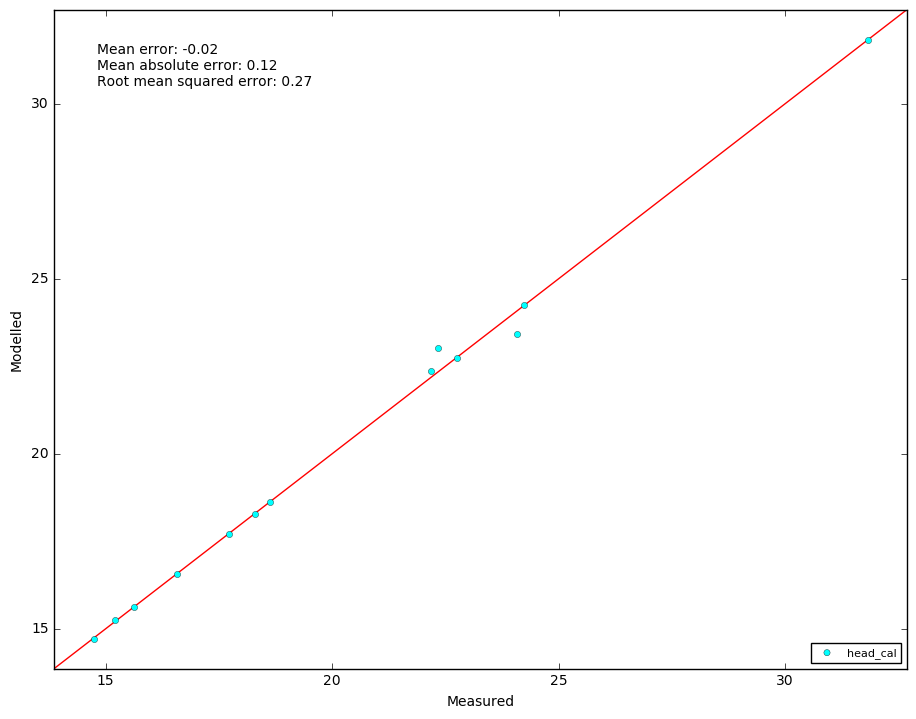

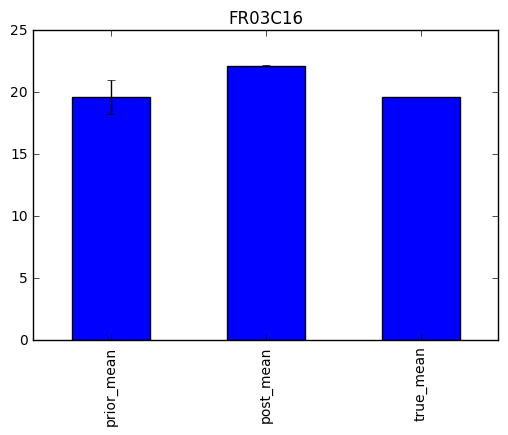

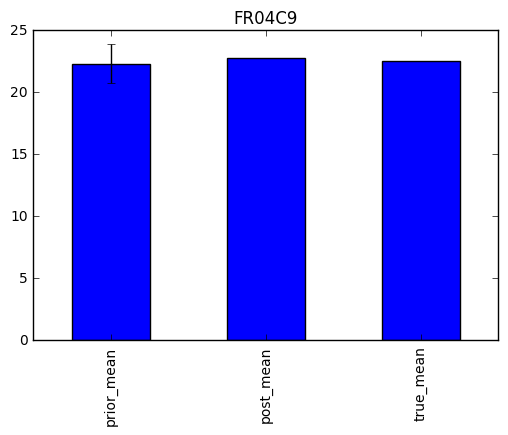

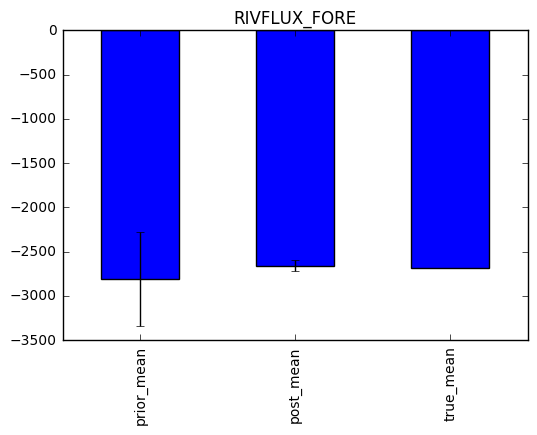

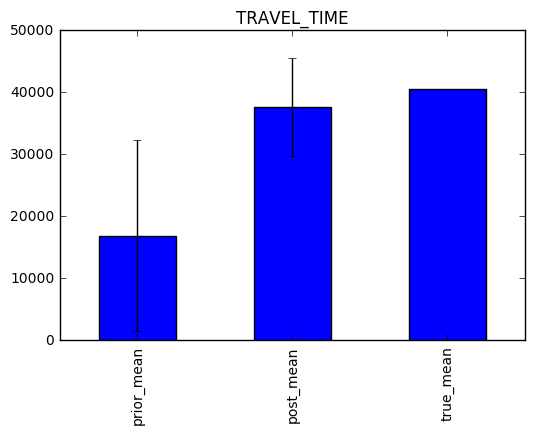

In [16]:
see_residuals('freyberg_pp_reg')

Let's plot up the results:

The __leftmost plot__ is "Truth", the __middle plot__ is our optimal values on the same scale as truth, and the __rightmost plot__ is plotted using a legend that spans a larger parameter range (to better show the extreme values)

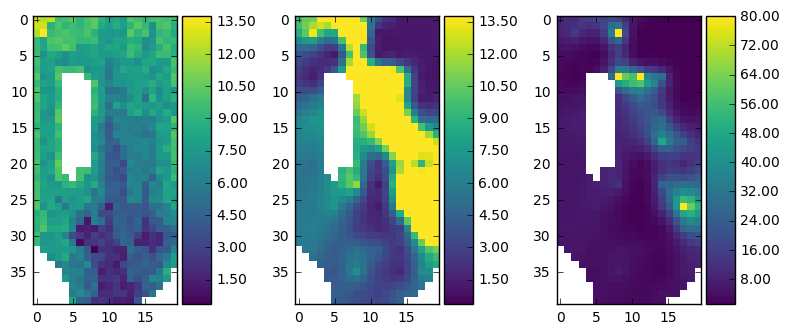

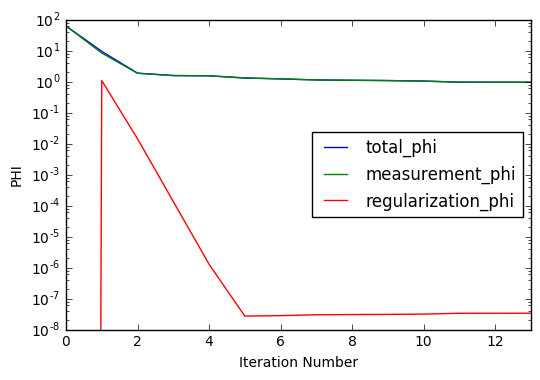

In [18]:
update_K('freyberg_pp_reg')

plot_K_results('freyberg_pp_reg')

## Yes, as expected when we set PHIMLIM very low we see that the regularization objective function is a very minor component of the total Phi that we are minimizing.  That is, we threw away our soft-knowledge in pursuit of the best fit to observations.

## Remember, this best fit to observations was not wasted effort - it tells us "how low we can go", and what value PHIMLIM must be larger than.  

## Reset PHIMLIM and re-run the optimization (look for the "RESET PHIMLIM HERE" heading).  Try something high to convince yourself that you can find a tradeoff of fit to observations and adherence to our soft-knowledge.  